<a href="https://colab.research.google.com/github/kingmolnar/DataScienceProgramming/blob/main/Data_Exploration_Project_Team10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="font-size:20px">**Data Exploration Project: Maximize Car Buying Power**</span>

# New Section

<span style="font-size:16px">Team 10 Members: Liana Gerhardt, Sam Haddad, James Hodgson, Lisa Ochs</span>

In [ ]:
#Keep this section; ensures that before any cell is run, all modules are reloaded
%reload_ext autoreload
%autoreload 2

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

<span style="font-size:20px">**Data Exploration Helper (we will delete this section after creating the .py file)**</span>

Keeping adding all of your functions so we can write the final version of the data_exploration_helper.py file

In [ ]:
%%writefile data_exploration_helper.py

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

car_df = pd.read_csv('https://raw.githubusercontent.com/jamesh9595/excel/main/Project1_car_data.csv') #load csv

def data_quality_numeric(car_df):
    pd.set_option('display.float_format', lambda x: '%.2f' % x) # set the precision option to 2 decimals
    numeric_df = car_df.drop(columns=['ID']).describe(percentiles=[.25, .5, .75]).T # drop the ID column
    return numeric_df

def data_quality_categorical(car_df):
    pd.set_option('display.float_format', lambda x: '%.2f' % x) # set the precision option to 2 decimals
    categorical_df = car_df.describe(include='object').T #include object to calculate descriptive statistics on categorical variables
    return categorical_df

def boxplot_outliers(df, columns_to_visualize):
    # Columns to visualize
    columns_to_visualize = ["Mileage", "Price USD", "Model Year", "Engine Capacity"]

    # Plot each specified column
    for column in columns_to_visualize:
        plt.figure(figsize=(20, 10))
        sns.boxplot(x=column, data=car_df)  # Set x as column name and specify the data argument
        plt.title(f'Boxplot of {column}')
        plt.show()


data_field_descriptions = {
    'Company Name': {
        'Data Type': 'object',
        'Description': 'Company name for each car brand',
        'Valid Values/Ranges': 'Non-negative objects',
        'Missing Values': 'none',
        'Source': 'Car_data.csv',
        'Additional Notes': 'There are 31 company names'
    },

    'Model Name': {
        'Data Type': 'object',
        'Description': 'Model Name of each car',
        'Valid Values/Ranges': 'Non-negative objects',
        'Missing Values': 'None',
        'Source': 'Car_data.csv',
        'Additional Notes': 'Multiple model names belong to one company'
    },

    'Price in PKR': {
        'Data Type': 'Integer',
        'Description': 'Price of each car in the dataset',
        'Valid Values/Ranges': 'Non-negative integers',
        'Missing Values': 'None',
        'Source': 'Car_data.csv',
        'Additional Notes': 'The price in this column has the unit of Pakistan Rupees'
    },

    'Model Year': {
        'Data Type': 'Integer',
        'Description': 'Model year for each car',
        'Valid Values/Ranges': 'Non-negative integers',
        'Missing Values': 'none',
        'Source': 'Car_data.csv',
        'Additional Notes': 'There are 196 model names'
    },

    'Location': {
        'Data Type': 'object',
        'Description': 'The location of each car in India',
        'Valid Values/Ranges': 'Non-negative objects',
        'Missing Values': 'None',
        'Source': 'Car_data.csv',
        'Additional Notes': 'Multiple cars can be located in the same location or spread out in different locations'
    },

    'Mileage': {
        'Data Type': 'Integer',
        'Description': 'The mileage for each car in the dataset',
        'Valid Values/Ranges': 'Non-negative integers',
        'Missing Values': 'none',
        'Source': 'Car_data.csv',
        'Additional Notes': 'The mileage ranges from 1 to 999999 miles'
    },

    'Engine Type': {
        'Data Type': 'object',
        'Description': 'Engine type for each car',
        'Valid Values/Ranges': 'Non-negative objects',
        'Missing Values': 'None',
        'Source': 'Car_data.csv',
        'Additional Notes': 'There are a total of 3 engine types: Patrol, Diesel, Hybrid'
    },

    'Engine Capacity': {
        'Data Type': 'Integer',
        'Description': 'The total volume of the cylinders in the engine',
        'Valid Values/Ranges': 'Non-negative integers',
        'Missing Values': 'None',
        'Source': 'Car_data.csv',
        'Additional Notes': 'There are 75 types of engine capacity'
    },

    'Color': {
        'Data Type': 'Object',
        'Description': 'The color of each car',
        'Valid Values/Ranges': 'Non-negative objects',
        'Missing Values': 'None',
        'Source': 'Car_data.csv',
        'Additional Notes': 'There are 24 different colors in this dataset'
    },

    'Assembly': {
        'Data Type': 'object',
        'Description': 'Where was the car assembled',
        'Valid Values/Ranges': 'Non-negative objects',
        'Missing Values': 'none',
        'Source': 'Car_data.csv',
        'Additional Notes': 'The car can be assembled locally or imported'
    },

    'Body Type': {
        'Data Type': 'object',
        'Description': 'Body type of the car',
        'Valid Values/Ranges': 'Non-negative objects',
        'Missing Values': 'None',
        'Source': 'Car_data.csv',
        'Additional Notes': 'There are 6 different body types: Hatchback, Sedan, SUV, Crossover, Van, Mini Van'
    },

    'Transmission Type': {
        'Data Type': 'Object',
        'Description': 'The transmission type for each car',
        'Valid Values/Ranges': 'Non-negative objects',
        'Missing Values': 'None',
        'Source': 'Car_data.csv',
        'Additional Notes': 'There are two types of transmissions: Automatic and Manual'
    },

    'Registration Status': {
        'Data Type': 'object',
        'Description': 'The status of the car',
        'Valid Values/Ranges': 'Non-negative objects',
        'Missing Values': 'None',
        'Source': 'Car_data.csv',
        'Additional Notes': 'The status of the car can be Un-Registered or Registered'
    },

    'Price USD': {
        'Data Type': 'integer',
        'Description': 'Price of the car converted to U.S. Dollars',
        'Valid Values/Ranges': 'Non-negative integers',
        'Missing Values': 'None',
        'Source': 'Car_data.csv',
    }}

def list_data_descriptors(car_df, data_field_descriptions):
    for column in car_df.columns:
        if column in data_field_descriptions:
            print(f"Column: {column}")
            description = data_field_descriptions[column]
            for key, value in description.items():
                print(f"{key}: {value}")
            print()
        else:
            print(f"No description available for column: {column}\n")



def plot_mean_price_by_model_year(car_df):
    # Define year bins (ranges) with 2-year intervals from 1990 to 2019
    year_bins = [1990, 1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2019]

    # Define labels for the bins
    year_labels = ['1990-1991', '1992-1993', '1994-1995', '1996-1997', '1998-1999', '2000-2001', '2002-2003',
                   '2004-2005', '2006-2007', '2008-2009', '2010-2011', '2012-2013', '2014-2015', '2016-2017',
                   '2018-2019']

    # Create a new column 'Model Year Range' that assigns rows to model year ranges
    car_df['Model Year Range'] = pd.cut(car_df['Model Year'], bins=year_bins, labels=year_labels)

    # Group by 'Model Year Range' and calculate the mean price for each group
    average_price_by_year = car_df.groupby('Model Year Range')['Price USD'].mean()

    rounded_average_price_year = round(average_price_by_year, 0)

    # Create a bar plot
    plt.figure(figsize=(8, 6))

    # Define x and y values
    model_year = average_price_by_year.index
    mean_year_prices = average_price_by_year.values

    # Create a custom color palette for the chart
    n_colors = 25
    base_color = "#0039A6"  # Base color for the gradient
    custom_palette = sns.color_palette(sns.light_palette(base_color, n_colors=n_colors)[4:25])

    # Plot bar graph
    bars = sns.barplot(x=model_year, y=mean_year_prices, palette=custom_palette)

    plt.title("Mean Price of Cars by Model Year",fontsize=24,y=1.03)
    plt.yticks(fontsize=10)
    plt.xticks(rotation=45, fontsize=10)
    plt.xlabel('Model Year', fontweight='bold', fontsize=14,labelpad=10)
    plt.ylabel('Mean Price ($)', fontweight='bold',fontsize=14,labelpad=10)

    plt.savefig("Mean_Price_of_Cars_by_Model_Year.png", dpi=150, bbox_inches="tight")
    plt.show()

def plot_numeric_histograms(df, numeric_cols):
    # Create subplots based on the number of numeric columns
    num_cols = len(numeric_cols)
    num_rows = (num_cols + 1) // 2  # Calculate the number of rows for subplots
    fig, ax = plt.subplots(num_rows, 2, figsize=(14, 10))
    ax = ax.flat

    for i, col in enumerate(numeric_cols):
        sns.histplot(df, x=col, ax=ax[i], color='#5573ad', kde=True)
        ax[i].set_xlabel(col)  # Set the x-axis label for each subplot

    # Remove any unused subplots
    for j in range(i + 1, num_rows * 2):
        fig.delaxes(ax[j])

    plt.suptitle('Numerical columns: Histograms', y=1.03, size=25)
    plt.tight_layout()
    plt.savefig("Distribution.png", dpi=150, bbox_inches="tight")
    plt.show()

def plot_modelyear_histogram(df):
# Histogram
  df_filtered = df[df['Model Year'] < 2020]

  plt.figure(figsize=(8, 6))

  sns.histplot(df_filtered['Model Year'], color='#4B6BA9', bins=30, kde=True)
  plt.title('Histogram of Model Year Distribution',fontsize=24,y=1.03)

  plt.subplots_adjust(left=0, right=1, top=0.9, bottom=0.1)
  plt.xlim(df_filtered['Model Year'].min(), 2019)
  x_ticks = range(df_filtered['Model Year'].min(), 2020, 2)
  plt.xticks(x_ticks,fontsize=10)

  plt.xlabel('Model Year',fontweight="bold",fontsize=14,labelpad=10)
  plt.yticks(fontsize=10)
  plt.ylabel('Frequency',fontweight="bold",fontsize=14,labelpad=10)
  plt.tight_layout()

  plt.savefig("Model Year Distribution.png", dpi=150, bbox_inches="tight")
  plt.show()

#GenAI was used to convert previous code for heatmap into a function. Previous code can be provided if required.
def plot_correlation_heatmap(car_df, numeric_cols, annot=True, cmap='coolwarm', annot_size=12, dpi=150, filename=None):
    # Select only numeric columns
    numeric_columns = car_df[numeric_cols]

    # Compute the correlation matrix
    correlation_matrix = numeric_columns.corr()

    # Create a heatmap with string annotations
    plt.figure(figsize=(9, 7))
    correlation = sns.heatmap(correlation_matrix, annot=annot, fmt='.2f', cmap=cmap, linewidths=0.5, annot_kws={"size": annot_size})
    plt.title('Correlation Plot with Annotations', fontsize=15)

    # Increase the size of tick annotations
    correlation.set_xticklabels(correlation.get_xticklabels(), size=annot_size)
    correlation.set_yticklabels(correlation.get_yticklabels(), size=annot_size)

    if filename:
        plt.savefig(filename, dpi=dpi, bbox_inches="tight")

    plt.show()


def brand_counts(car_df, column_name='Company Name'):
    brand_counts = car_df[column_name].value_counts()  # Get the value counts
    df_brand_counts = brand_counts.reset_index()  # Convert to DataFrame
    df_brand_counts.columns = ['Brand', 'Count']  # Rename the columns
    plt.figure(figsize=(15, 10)) # Create a bar plot using Seaborn
    sns.barplot(x='Count', y='Brand', data=df_brand_counts, palette='coolwarm')
    plt.title('Count of Cars by Brand')
    plt.xlabel('Count')
    plt.ylabel('Brand')
    plt.show()

def brand_price_histogram(car_df, company_col_name='Company Name', price_col_name='Price USD'):

    filtered_car_df = car_df.groupby(company_col_name).filter(lambda x: x[price_col_name].std() > 0) # Filter out brands with zero price variance

    unique_brands = filtered_car_df[company_col_name].unique()  # Get unique brands and assign a color from the coolwarm palette to each brand
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(unique_brands)))
    palette_dict = dict(zip(unique_brands, colors))

    plt.figure(figsize=(15, 10))
    sns.histplot(data=filtered_car_df, x=price_col_name, hue=company_col_name, palette=palette_dict, kde=True)
    plt.title(f"Histogram of {price_col_name} by {company_col_name}")
    plt.xlabel(price_col_name)
    plt.ylabel("Frequency")
    plt.show()

def plot_car_price_distribution(car_df):
    # I used GenAI to ideate on the best visual and to help generate the code step-by-step
    slide_colors = ["#0039A6", "#D5BD22", "#97CAEB", "#A4B3A3", "#00AFF0", "#C40C30" , "#006F42", "#EBEBEA", "#404041"]  # Pre-defined hex values for slide color palette
    plt.figure(figsize=(11, 6.5))

    sns.boxplot(data=car_df, x='Company Name', y='Price USD', palette=slide_colors) # Boxplot for visualizing data distributions
    sns.pointplot(data=car_df, x='Company Name', y='Price USD', color='black', markers='d', linestyles='', ci=95) # Pointplot for visualizing group means and confidence intervals
    plt.xticks(rotation=45)
    plt.title('Price USD distribution among Car Brands')
    plt.show()

def compute_anova_on_brands(car_df, company_col='Company Name', price_col='Price USD'):
    brands = car_df[company_col].unique()# get unique values from company name
    grouped_data = [car_df[price_col][car_df[company_col] == brand] for brand in brands] #group the price data by each unique brand name
    return stats.f_oneway(*grouped_data) # compute ANOVA and return result


def visualize_anova_results(car_df, company_col='Company Name', price_col='Price USD', alpha=0.05): #needs to be added to the helper file
#I used GenAI to ideate on the best visual and to help generate the code
    brands = car_df[company_col].unique() # Existing ANOVA computation
    grouped_data = [car_df[price_col][car_df[company_col] == brand] for brand in brands]
    f_stat, p_value = stats.f_oneway(*grouped_data)
    tukey = pairwise_tukeyhsd(endog=car_df[price_col], groups=car_df[company_col], alpha=alpha) # Post-hoc test (Tukey HSD)
    summary = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
    plt.figure(figsize=(15, 10)) # Visualization
    sns.boxplot(data=car_df, x=company_col, y=price_col)
    for i, brand in enumerate(brands):
        brand_data = summary[summary.group1 == brand]
        for _, row in brand_data.iterrows():
            if row['reject'] == True: # significant difference
                position = brands.tolist().index(row['group2'])
                plt.annotate("*", (position, car_df[price_col][car_df[company_col] == row['group2']].max()), ha='center')

    plt.xticks(rotation=45)
    plt.title(f'Price USD distribution among Car Brands\nANOVA F-stat: {f_stat:.2f}, p-value: {p_value:.3f}')
    #plt.savefig("brand_effect.png", dpi=300, bbox_inches='tight') # Save the figure
    plt.show()

def compute_eta_squared(car_df):
    import matplotlib.pyplot as plt
    from matplotlib.colors import LinearSegmentedColormap
    # I used GenAI to ideate on the best visual and to help generate the code
    overall_mean = car_df['Price USD'].mean()
    ssb = sum(car_df.groupby('Company Name').apply(lambda x: len(x) * (x['Price USD'].mean() - overall_mean)**2))  # Compute SSB (sum of squares between)
    ssw = sum(car_df.groupby('Company Name').apply(lambda x: sum((x['Price USD'] - x['Price USD'].mean())**2)))  # Compute SSW (sum of squares within)
    sst = ssb + ssw  # Compute SST (total sum of squares)
    group_counts = car_df.groupby('Company Name').size()  # Compute and return eta squared for each brand
    group_means = car_df.groupby('Company Name')['Price USD'].mean()
    return (group_counts * (group_means - overall_mean)**2) / sst

def visualize_eta_squared(eta_squared_values):
    import matplotlib.pyplot as plt
    from matplotlib.colors import LinearSegmentedColormap

    # I used GenAI to ideate on the best visual and to help generate the code
    selected_companies = ["Toyota", "Nissan", "Subaru", "Honda", "Suzuki", "Hyundai", "Lexus", "Honda", "Daihatsu", "Mitsubishi" , "Mercedes" , "Audi" ] # List of specific companies to include in the heatmap
    selected_eta_squared = eta_squared_values[eta_squared_values.index.isin(selected_companies)] # Filter eta_squared_values to only include selected companies
    heatmap_data = selected_eta_squared.reset_index(name='eta_squared').pivot_table(index='Company Name', values='eta_squared', aggfunc='mean')
    matrix = np.array([[149030, 34],[7442, 12]]) # Custom heatmap color scheme inspired by stack overflow
    norm = plt.Normalize(matrix.min(), matrix.max())
    boundaries = sorted(matrix.flatten().tolist())
    colors = [[norm(boundaries[0]), "#F1F1F2"],
              [norm(boundaries[1]), "#F1F1F2"],
              [norm(boundaries[2]), "#F1F1F2"],
              [norm(boundaries[3]), "#0039A6"]]

    cmap = LinearSegmentedColormap.from_list("", colors)

    plt.figure(figsize=(11, len(selected_companies) * 0.5)) # Create the heatmap
    sns.heatmap(heatmap_data, annot=True, cmap=cmap, cbar_kws={'label': 'Effect Size Value'}, vmin=0, vmax=eta_squared_values.max(), fmt=".5f")
    plt.title('Specific Company Names by Effect Size')
    plt.tight_layout()
    plt.show()

def analyze_brand_prices(df, brand_name):
#I used GenAI to ideate on the best visual and to help generate the code
    brand_df = df[df['Company Name'] == brand_name] # Filter the dataframe for the given brand

    mean_price = brand_df['Price USD'].mean() # Descriptive Statistics
    median_price = brand_df['Price USD'].median()
    price_range = brand_df['Price USD'].max() - brand_df['Price USD'].min()
    std_dev = brand_df['Price USD'].std()

    print(f"Mean Price for {brand_name}: ${mean_price:.2f}")
    print(f"Median Price for {brand_name}: ${median_price:.2f}")
    print(f"Price Range for {brand_name}: ${price_range:.2f}")
    print(f"Standard Deviation of Price for {brand_name}: ${std_dev:.2f}")

    plt.figure(figsize=(12, 5)) # Visual Analysis

    plt.subplot(1, 2, 1)  # Histogram
    sns.histplot(brand_df['Price USD'], kde=True, bins=30)
    plt.title(f'Histogram of {brand_name} Prices')
    plt.xlabel('Price USD')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2) # Box Plot
    sns.boxplot(x=brand_df['Price USD'])
    plt.title(f'Box Plot of {brand_name} Prices')
    plt.xlabel('Price USD')

    plt.tight_layout()
    plt.show()

def visualize_model_counts(df):
    #I used GenAI to ideate on the best visual and to help generate the code
    # Group by the 'Company Name' column and count unique 'Model Name' for each company
    model_counts = df.groupby('Company Name')['Model Name'].nunique().sort_values(ascending=False)

    # Visualize
    plt.figure(figsize=(12, 10))
    sns.barplot(y=model_counts.index, x=model_counts.values, palette='viridis')
    plt.xlabel('Number of Unique Models')
    plt.ylabel('Company Name')
    plt.title('Number of Unique Models per Company')
    plt.tight_layout()
    plt.show()


###def mileage_correlations(car_df):
   # conversion_factor = 0.621371
    #df['Mileage_miles'] = car_df['Mileage'] * conversion_factor  # Create a new column with mileage in miles
    #stats.pearsonr(car_df['Mileage'], car_df['Price USD'])
    #sns.regplot(data=car_df, x='Mileage', y='Price USD', line_kws={"color": "darkred"})
    #plt.show()

def mileage_correlations(car_df):
    conversion_factor = 0.621371
    car_df['Mileage_miles'] = car_df['Mileage'] * conversion_factor  # Create a new column with mileage in miles
    correlation, _ = stats.pearsonr(car_df['Mileage'], car_df['Price USD'])
    sns.regplot(data=car_df, x='Mileage', y='Price USD', line_kws={"color": "darkred"})
    plt.show()

def plot_top_10_mean_mileage(data_file):
    # Load the dataset
    car_df = pd.read_csv('https://raw.githubusercontent.com/jamesh9595/excel/main/Project1_car_data.csv') #load csv
    # Calculate the mean mileage for each brand
    brand_mean_mileage = car_df.groupby('Company Name')['Mileage'].mean()

    # Select the top 10 brands based on mean mileage (smallest to biggest)
    top_10_smallest_to_biggest = brand_mean_mileage.nsmallest(10)

    # Create a bar chart to visualize the mean mileage of the top 10 brands
    plt.figure(figsize=(12, 6))
    ax = top_10_smallest_to_biggest.plot(kind='bar', color='skyblue')
    plt.title('Mean Mileage of Top 10 Car Brands')
    plt.xlabel('Car Brand')
    plt.ylabel('Mean Mileage')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Annotate the bars with average mileage values
    for i, v in enumerate(top_10_smallest_to_biggest):
        ax.text(i, v + 5, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()




Overwriting data_exploration_helper.py


In [ ]:
def plot_correlation_heatmap(car_df, numeric_cols, annot=True, cmap='coolwarm', annot_size=12, dpi=150, filename=None):
    # Select only numeric columns
    numeric_columns = car_df[numeric_cols]

    # Compute the correlation matrix
    correlation_matrix = numeric_columns.corr()

    # Create a heatmap with string annotations
    plt.figure(figsize=(9, 7))
    correlation = sns.heatmap(correlation_matrix, annot=annot, fmt='.2f', cmap=cmap, linewidths=0.5, annot_kws={"size": annot_size})
    plt.title('Correlation Plot with Annotations', fontsize=15)

    # Increase the size of tick annotations
    correlation.set_xticklabels(correlation.get_xticklabels(), size=annot_size)
    correlation.set_yticklabels(correlation.get_yticklabels(), size=annot_size)

    if filename:
        plt.savefig(filename, dpi=dpi, bbox_inches="tight")

    plt.show()


<span style="font-size:20px">**Load Data**</span>

Contributor: James Hodgson

In [ ]:
import pandas as pd
car_df = pd.read_csv('https://raw.githubusercontent.com/jamesh9595/excel/main/Project1_car_data.csv') #load csv
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Set the precision option
current_year = datetime.now().year
car_df['Car Age'] = (current_year - car_df['Model Year'])

In [ ]:
car_df.head(10)

,ID,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status,Price USD,Car Age
0,0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered,8303.739,6
1,1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered,386.463,4
2,2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered,5326.927,4
3,3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered,5744.725,4
4,4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered,4996.170,13
5,5,Honda,Civic,3850000,2017,Punjab,22000,Petrol,1500,Black,Local,Sedan,Automatic,Registered,13404.359,6
6,6,Suzuki,Wagon,1440000,2017,Punjab,31000,Petrol,1000,White,Local,Hatchback,Manual,Registered,5013.578,6
7,7,Mitsubishi,Mirage,1425000,2012,Punjab,101000,Petrol,1000,Black,Imported,Hatchback,Automatic,Registered,4961.354,11
8,8,Toyota,Prado,2650000,1998,Punjab,110000,Diesel,3000,Beige,Imported,SUV,Automatic,Registered,9226.377,25
9,9,Honda,Civic,3350000,2017,Punjab,60000,Petrol,1800,White,Local,Sedan,Automatic,Registered,11663.533,6


In [ ]:
print(f"Number of records: {car_df.shape[0]:,}")

Number of records: 46,022


In [ ]:
car_df.shape

(46022, 16)

<span style="font-size:20px">**Missing Values and Unique Values**</span>

Contributor: Liana Gerhardt

In [ ]:
def summary(df):
    print('-' * 15)
    print(f'Total Number of Duplicated Data within DataFrame: {df[df.duplicated()].sum().sum()}')
    print('-' * 15)
    print(f"Total Number of Unique Data within DataFrame: {df.stack().nunique()}")
summary(car_df)


---------------
Total Number of Duplicated Data within DataFrame: 0.0
---------------
Total Number of Unique Data within DataFrame: 53178


<span style="font-size:20px">**Data Quality Tables**</span>

Contributor: Lisa Ochs

In [ ]:
# call the numeric data quality table function from the helper.py file
from data_exploration_helper import (data_quality_numeric)
data_quality_numeric(car_df)

,count,mean,std,min,25%,50%,75%,max
Price,46022.00,2014153.23,2939071.19,111000.00,850000.00,1450000.00,2300000.00,77500000.00
Model Year,46022.00,2011.04,6.40,1990.00,2007.00,2013.00,2016.00,2019.00
Mileage,46022.00,90965.13,63656.66,1.00,48899.50,80000.00,120000.00,999999.00
Engine Capacity,46022.00,1313.12,614.69,16.00,1000.00,1300.00,1500.00,6600.00
Price USD,46022.00,7012.58,10232.82,386.46,2959.40,5048.39,8007.80,269828.01
Car Age,46022.00,11.96,6.40,4.00,7.00,10.00,16.00,33.00


In [ ]:
# call the categorical data quality table function from the helper.py file
from data_exploration_helper import (data_quality_categorical)
data_quality_categorical(car_df)

,count,unique,top,freq
Company Name,46022,31,Suzuki,15944
Model Name,46022,196,Corolla,8198
Location,46022,6,Punjab,24732
Engine Type,46022,3,Petrol,43590
Color,46022,24,White,17588
Assembly,46022,2,Local,31210
Body Type,46022,6,Hatchback,21576
Transmission Type,46022,2,Manual,24611
Registration Status,46022,2,Registered,42693


<span style="font-size:20px">**Data Conversions**</span>

Contributor: James Hodgson

<span style="font-size:20px">**Outliers**</span>

Contributor: Lisa Ochs

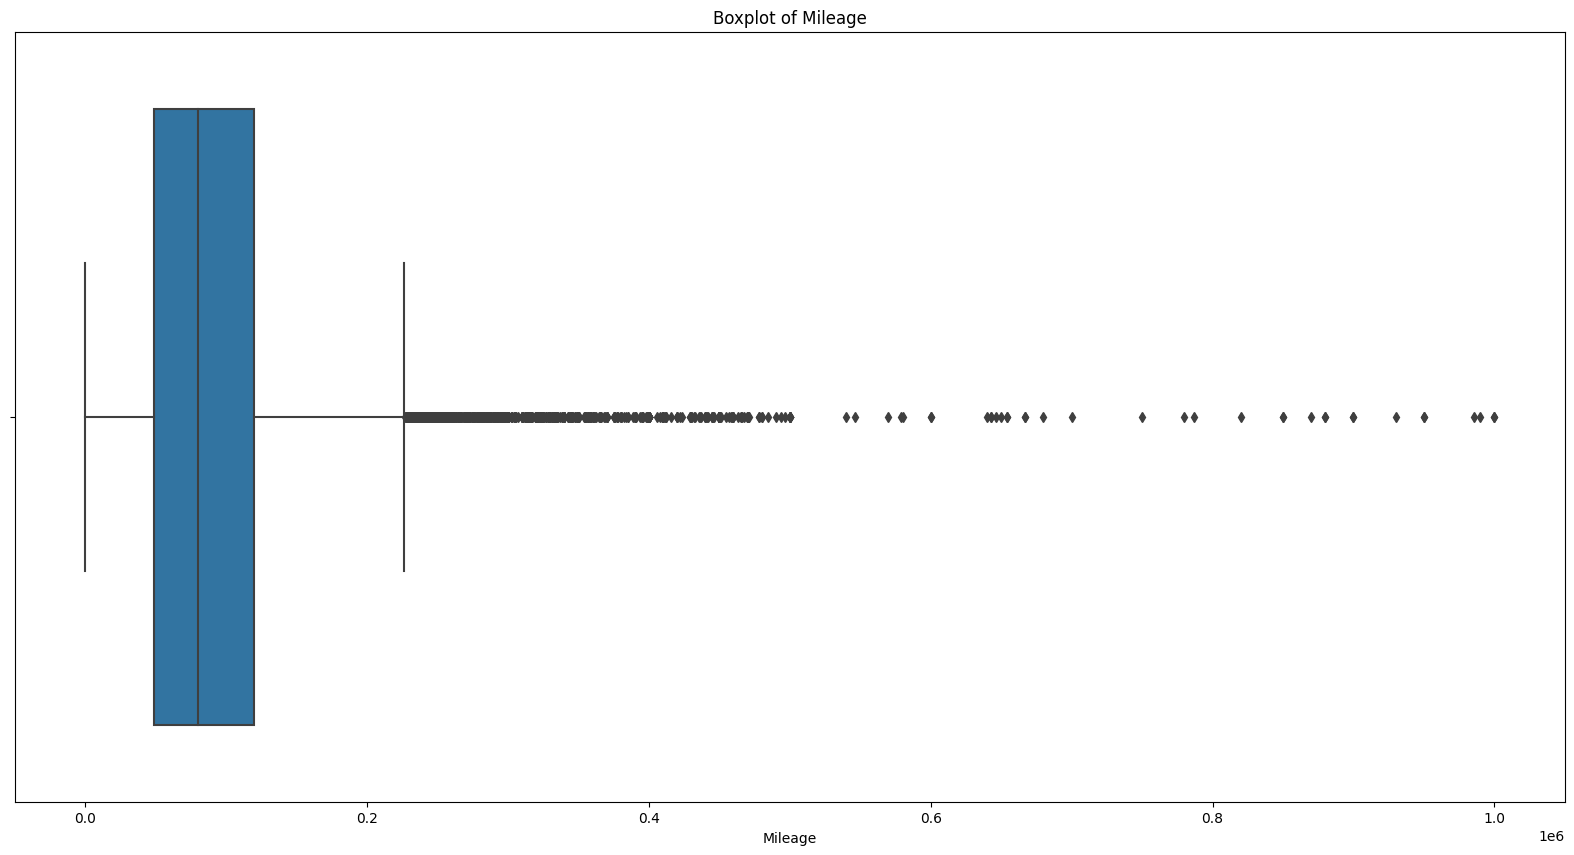

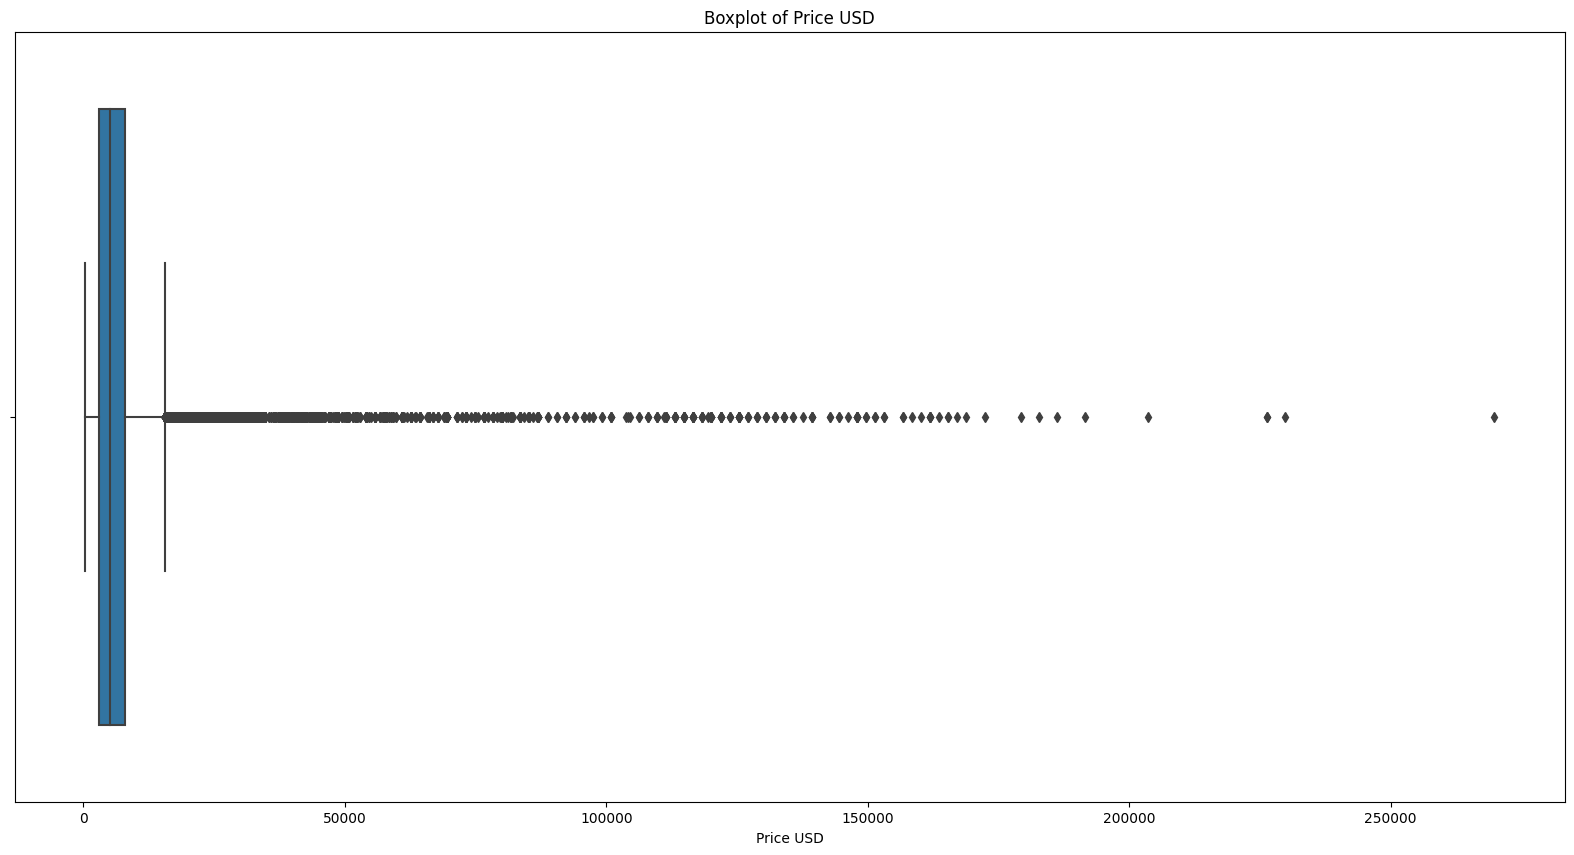

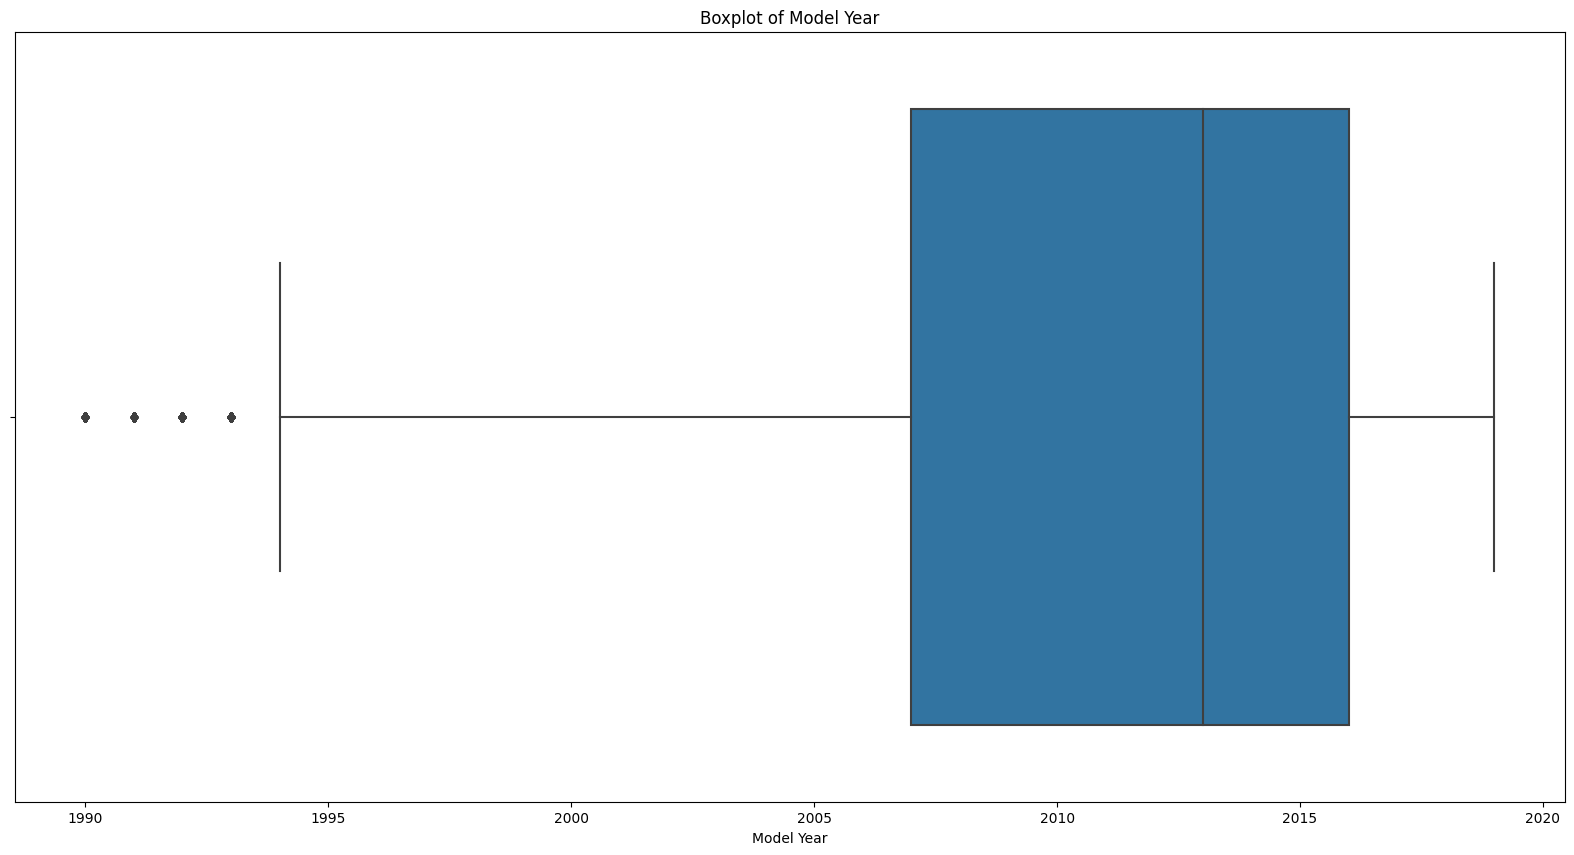

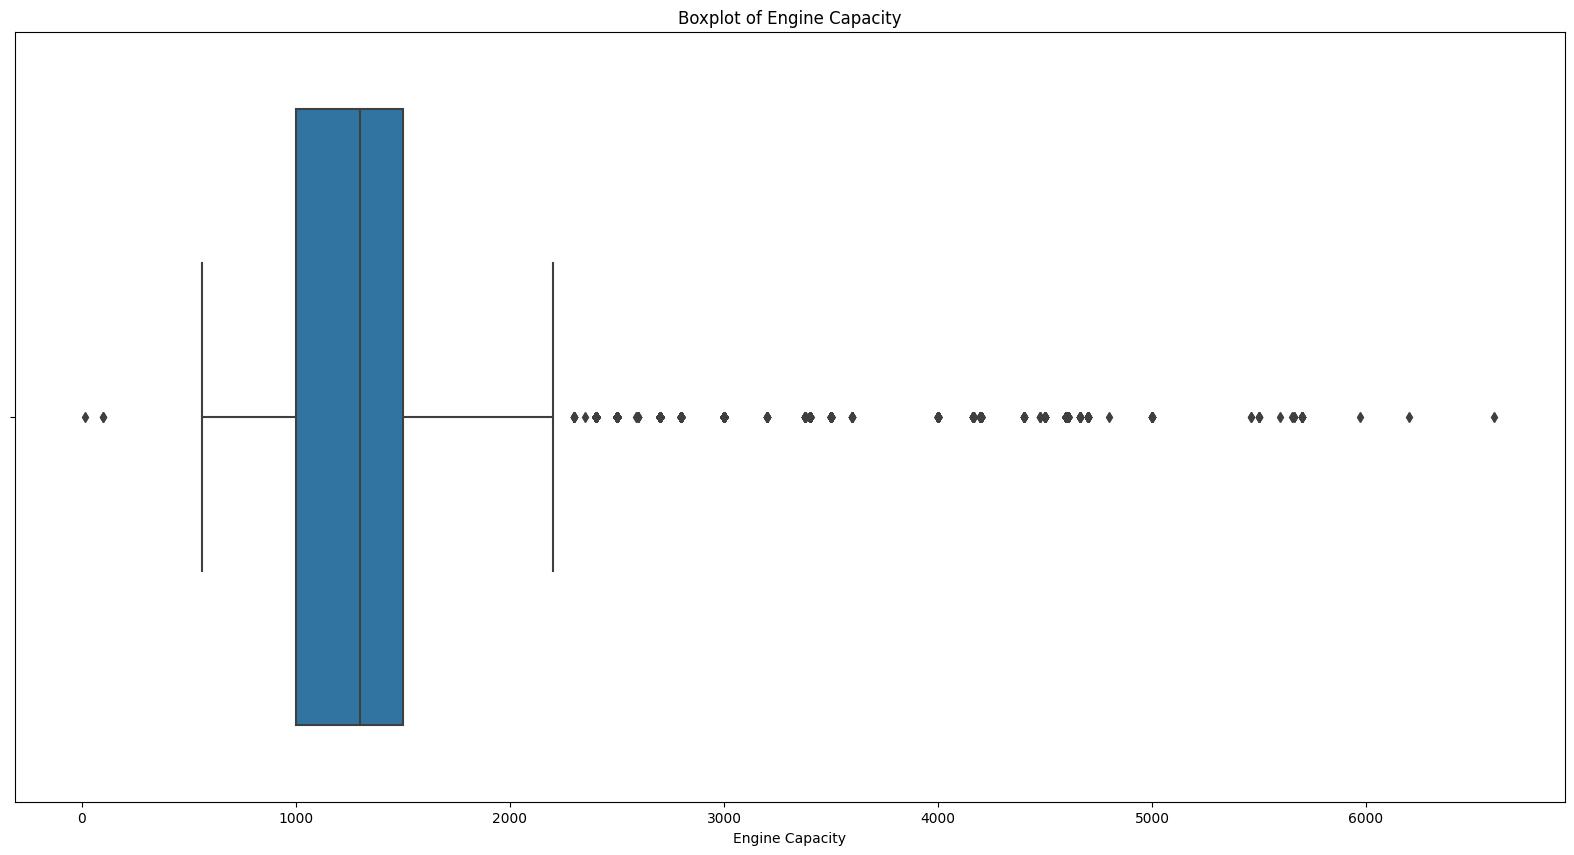

In [ ]:
# call the boxplot outlier function from the helper.py file
from data_exploration_helper import (boxplot_outliers)
boxplot_outliers(car_df, ["Mileage", "Price USD", "Model Year", "Engine Capacity"])

In [ ]:
def boxplot_outliers(df, columns_to_visualize):
    # Columns to visualize
    columns_to_visualize = ["Mileage", "Price USD", "Model Year", "Engine Capacity"]

    # Plot each specified column
    for column in columns_to_visualize:
        plt.figure(figsize=(20, 10))
        sns.boxplot(x=column, data=car_df)  # Set x as column name and specify the data argument
        plt.title(f'Boxplot of {column}')
        plt.show()


<span style="font-size:20px">**Data Types**</span>

Contributor: Sam Haddad

In [ ]:
print("Column datatypes: ")
print(car_df.dtypes)

Column datatypes: 
ID                       int64
Company Name            object
Model Name              object
Price                    int64
Model Year               int64
Location                object
Mileage                  int64
Engine Type             object
Engine Capacity          int64
Color                   object
Assembly                object
Body Type               object
Transmission Type       object
Registration Status     object
Price USD              float64
Car Age                  int64
dtype: object


<span style="font-size:20px">**Data Field Descriptions**</span>

Contributor: Sam Haddad

In [ ]:
# call the data decriptor function from the helper.py file
from data_exploration_helper import (list_data_descriptors)
list_data_descriptors(car_df, data_field_descriptions)

No description available for column: ID

Column: Company Name
Data Type: object
Description: Company name for each car brand
Valid Values/Ranges: Non-negative objects
Missing Values: none
Source: Car_data.csv
Additional Notes: There are 31 company names

Column: Model Name
Data Type: object
Description: Model Name of each car
Valid Values/Ranges: Non-negative objects
Missing Values: None
Source: Car_data.csv
Additional Notes: Multiple model names belong to one company

No description available for column: Price

Column: Model Year
Data Type: Integer
Description: Model year for each car
Valid Values/Ranges: Non-negative integers
Missing Values: none
Source: Car_data.csv
Additional Notes: There are 196 model names

Column: Location
Data Type: object
Description: The location of each car in India
Valid Values/Ranges: Non-negative objects
Missing Values: None
Source: Car_data.csv
Additional Notes: Multiple cars can be located in the same location or spread out in different locations

Colum

<span style="font-size:20px">**Distribution of Values**</span>

Contributor: Liana Gerhardt

Plot histograms of distribution of values for all fields.

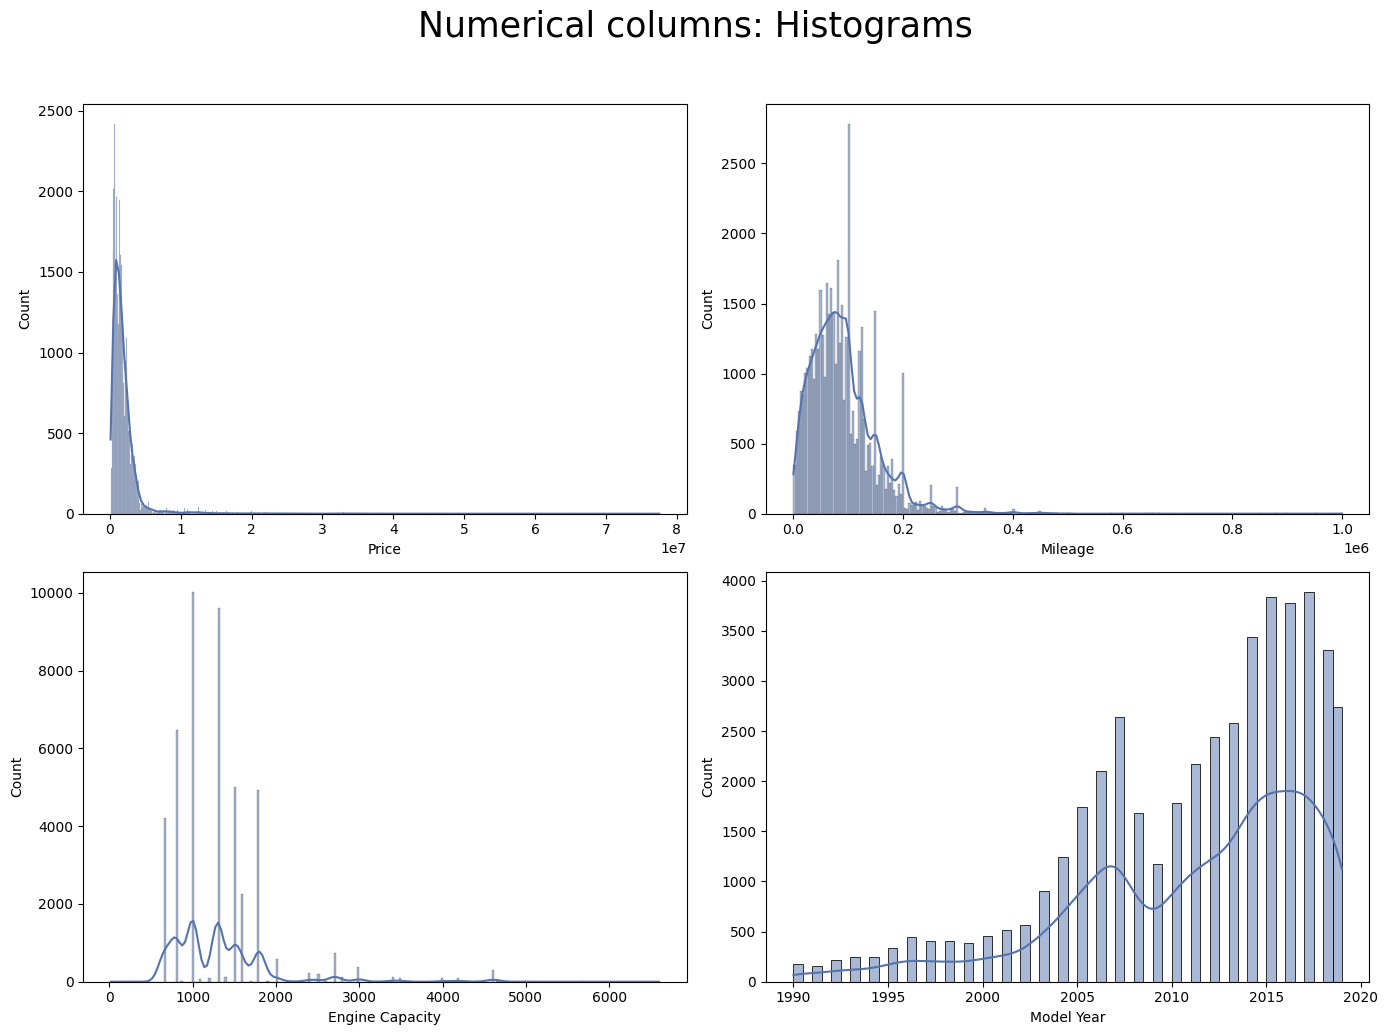

In [ ]:
#import plot_histograms from data exploration helper
numeric_cols = ['Price', 'Mileage', 'Engine Capacity', 'Model Year']
from data_exploration_helper import (plot_numeric_histograms)
plot_numeric_histograms(car_df,numeric_cols)

<span style="font-size:20px">**Mileage Correlations**</span>

Contributor: Sam Haddad

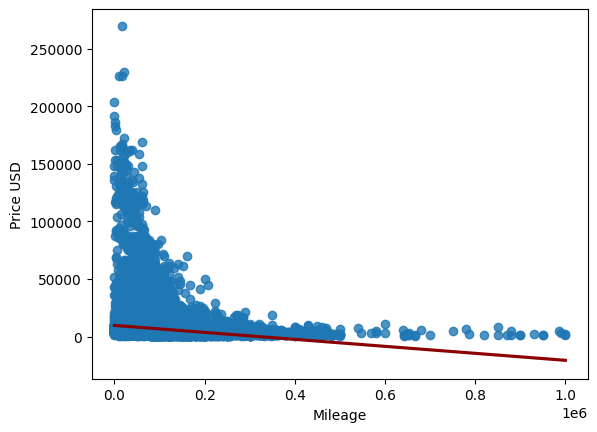

In [ ]:
from data_exploration_helper import (mileage_correlations)
mileage_correlations(car_df)


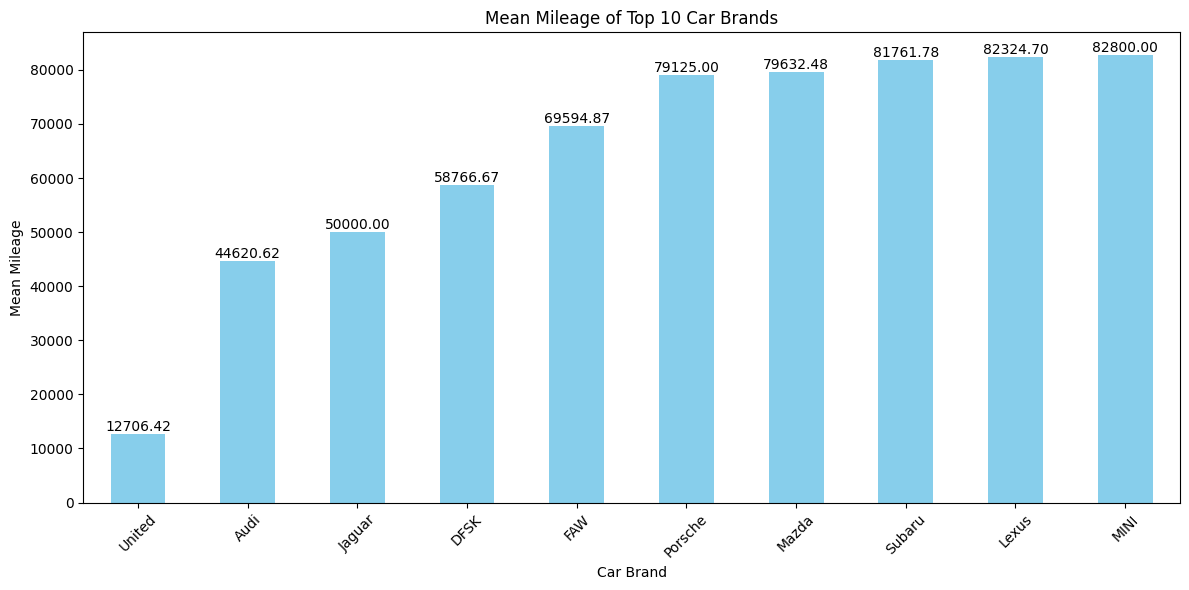

In [ ]:
from data_exploration_helper import (plot_top_10_mean_mileage)
plot_top_10_mean_mileage (car_df)

<span style="font-size:20px">**Car Model Year Correlations**</span>

Contributor: Liana Gerhardt

As you can see below. Older cars generally fall within the 2-4,000 USD range until years 2008-2009. Used car prices increase until 2018, where we see a mean price decrease.




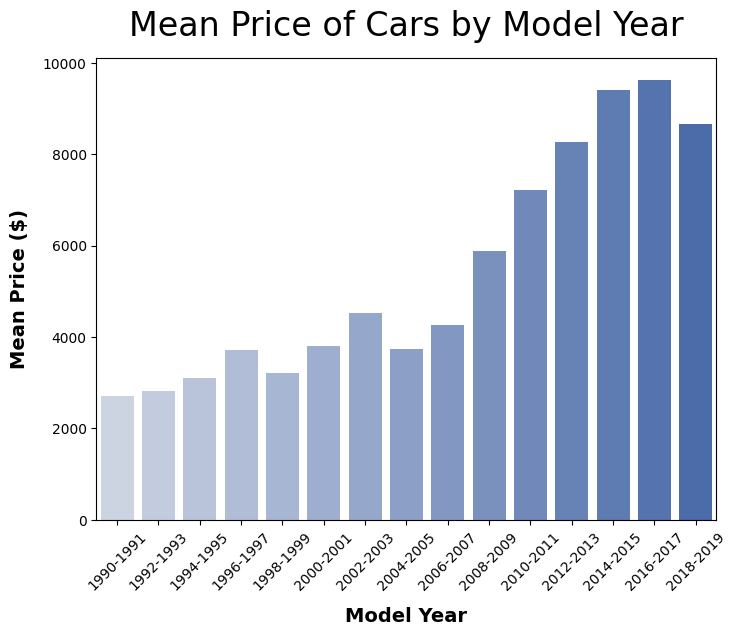

In [ ]:
# call the mean_price_by_model_year function from the helper.py file
#this function calculates the mean price per model year and plots the results.

from data_exploration_helper import (plot_mean_price_by_model_year)
plot_mean_price_by_model_year(car_df)


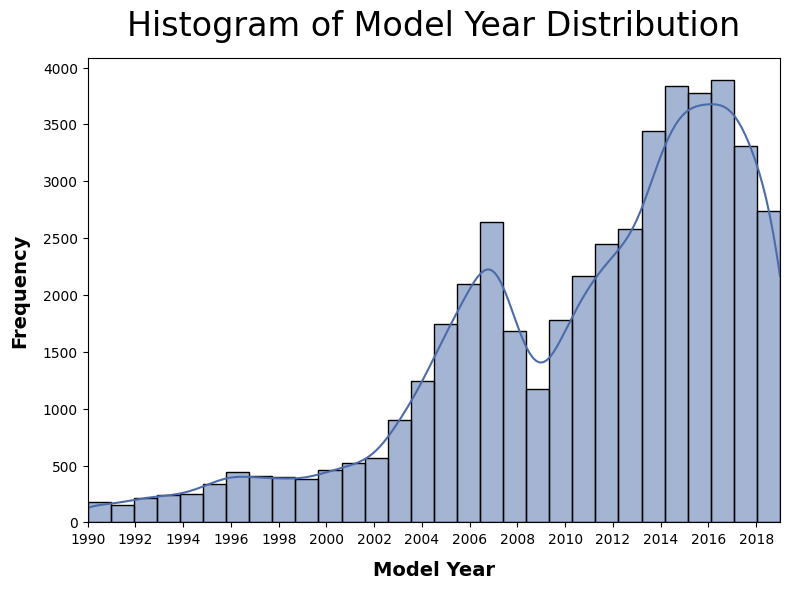

In [ ]:
#import plot_histograms from data exploration helper
from data_exploration_helper import (plot_modelyear_histogram)
plot_modelyear_histogram(car_df)



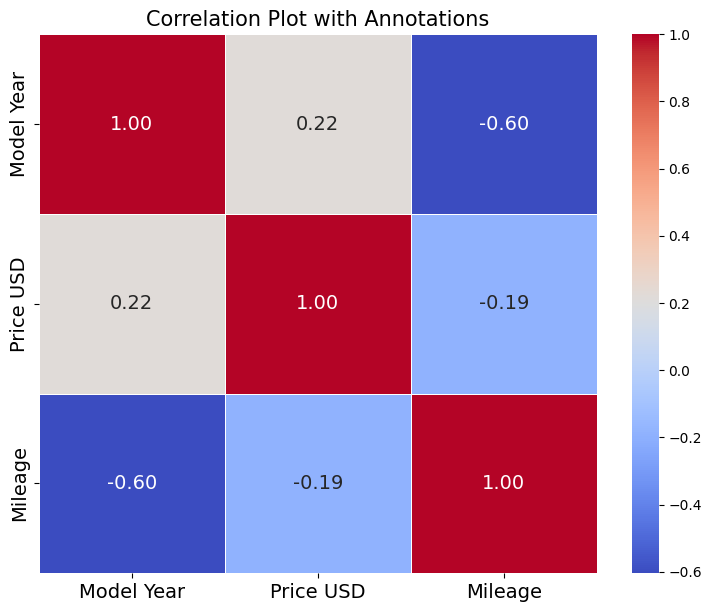

In [ ]:
numeric_cols=['Model Year', 'Price USD','Mileage']
plot_correlation_heatmap(car_df, numeric_cols=numeric_cols, annot=True, cmap='coolwarm', annot_size=14, dpi=150, filename="Correlation Map.png")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<span style="font-size:20px">**Car Brand Correlations**</span>

Contributor: Lisa Ochs

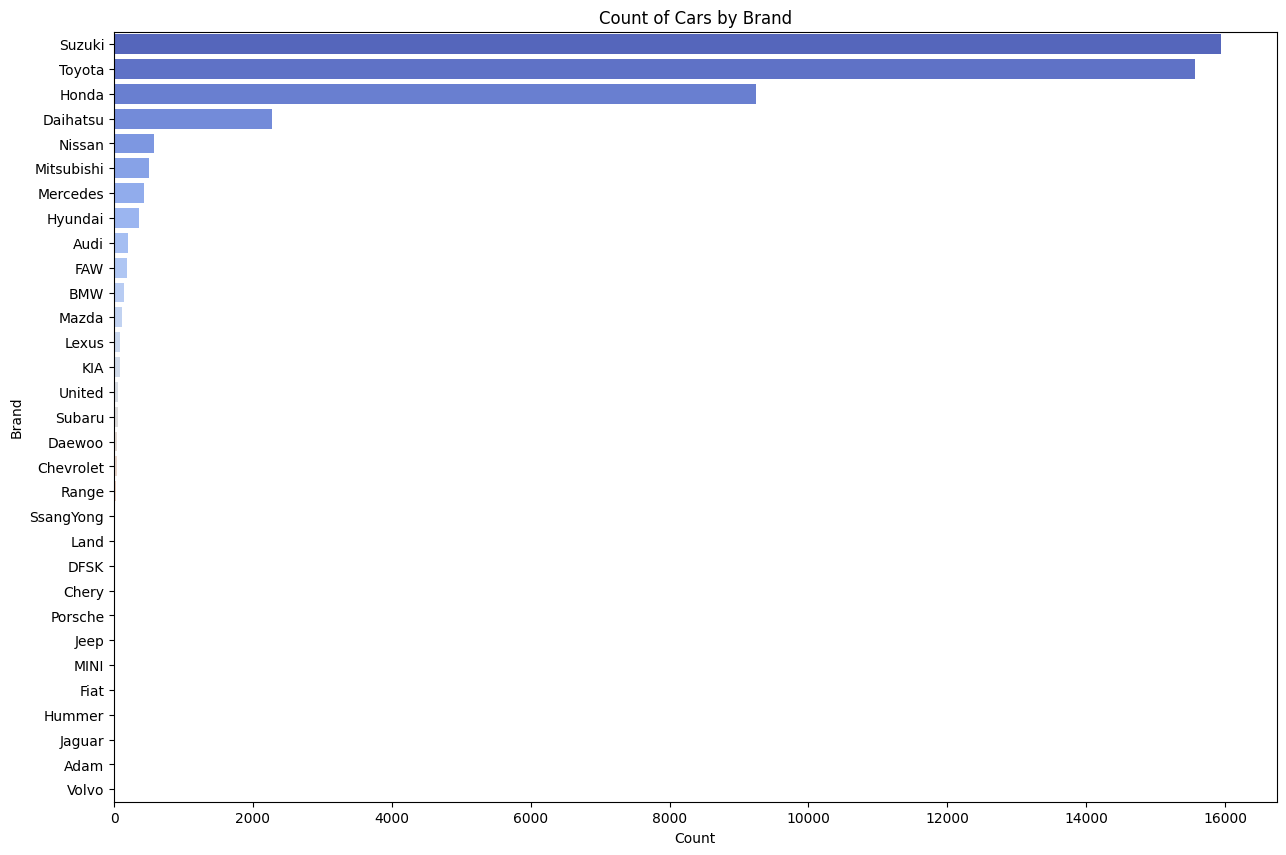

In [ ]:
# call the brand counts function from the helper.py file
from data_exploration_helper import (brand_counts)
brand_counts(car_df, column_name='Company Name')

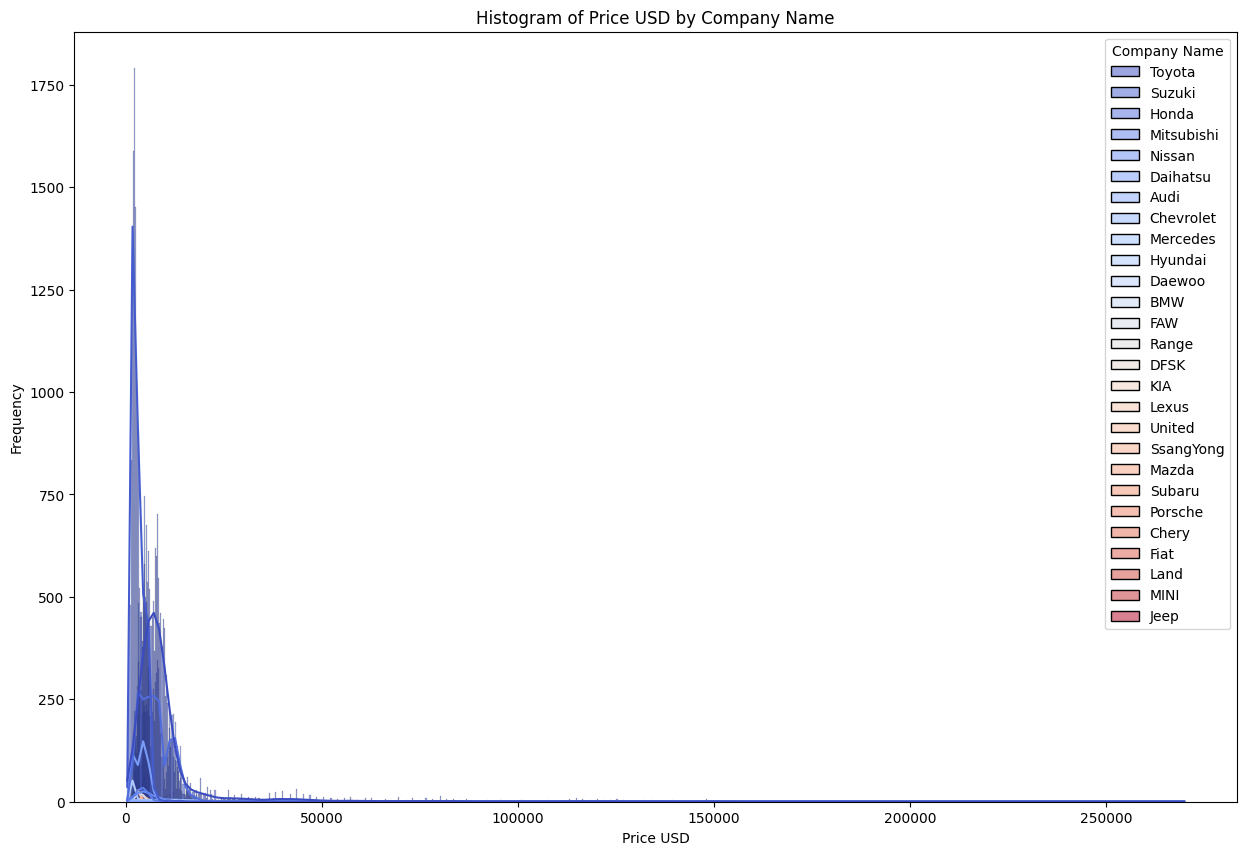

In [ ]:
# call the brand price histogram function from the helper.py file
from data_exploration_helper import (brand_price_histogram)
brand_price_histogram(car_df)

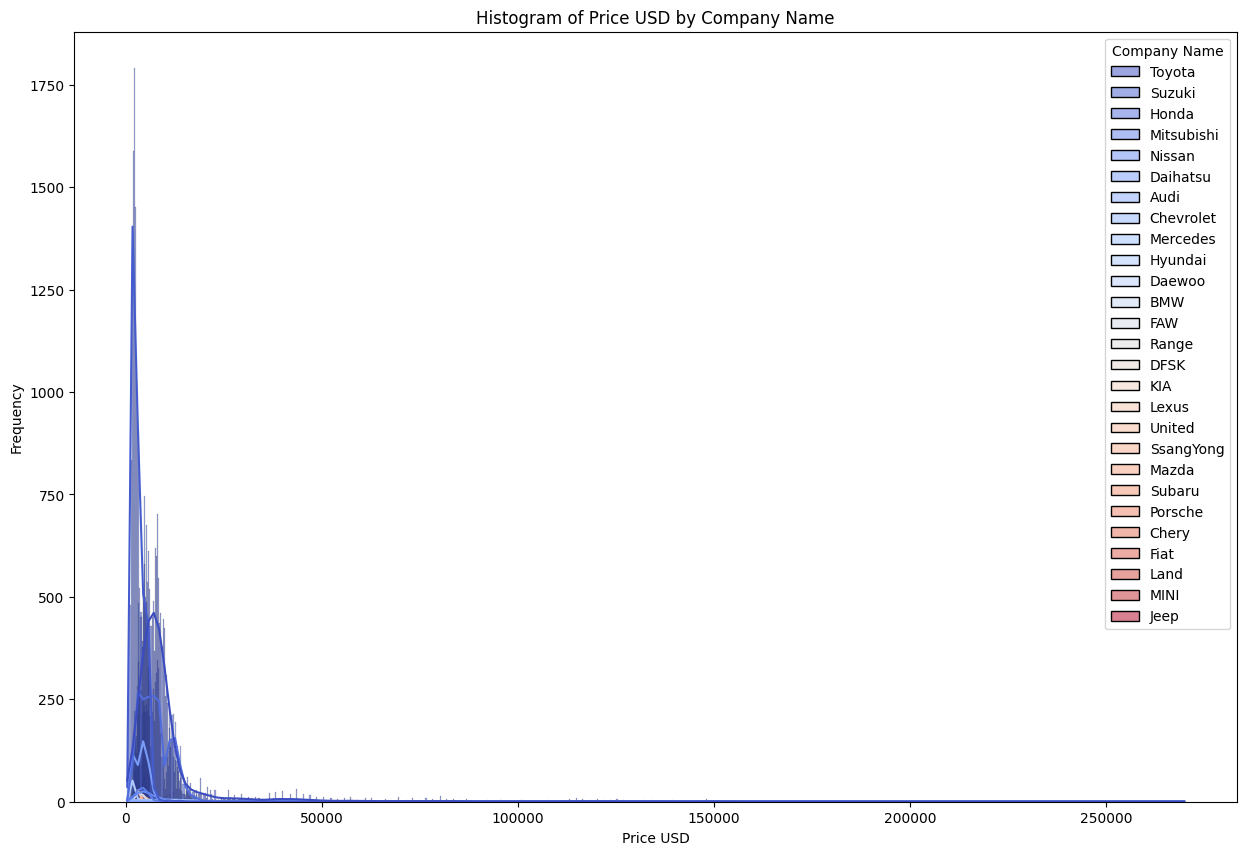

In [ ]:
# call the brand price histogram function from the helper.py file
from data_exploration_helper import (brand_price_histogram)
brand_price_histogram(car_df)

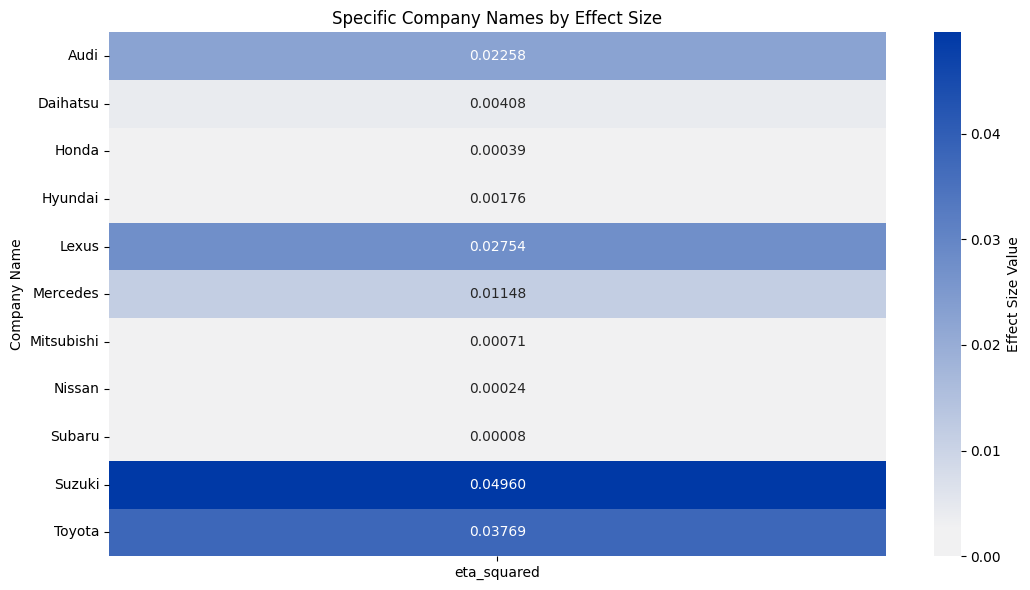

In [ ]:
# call the compute ETA Squared and visualize function from the helper.py file
from data_exploration_helper import compute_eta_squared, visualize_eta_squared
eta_squared_values = compute_eta_squared(car_df)
visualize_eta_squared(eta_squared_values)

Mean Price for Suzuki: $3140.57
Median Price for Suzuki: $2698.28
Price Range for Suzuki: $15249.63
Standard Deviation of Price for Suzuki: $1552.28


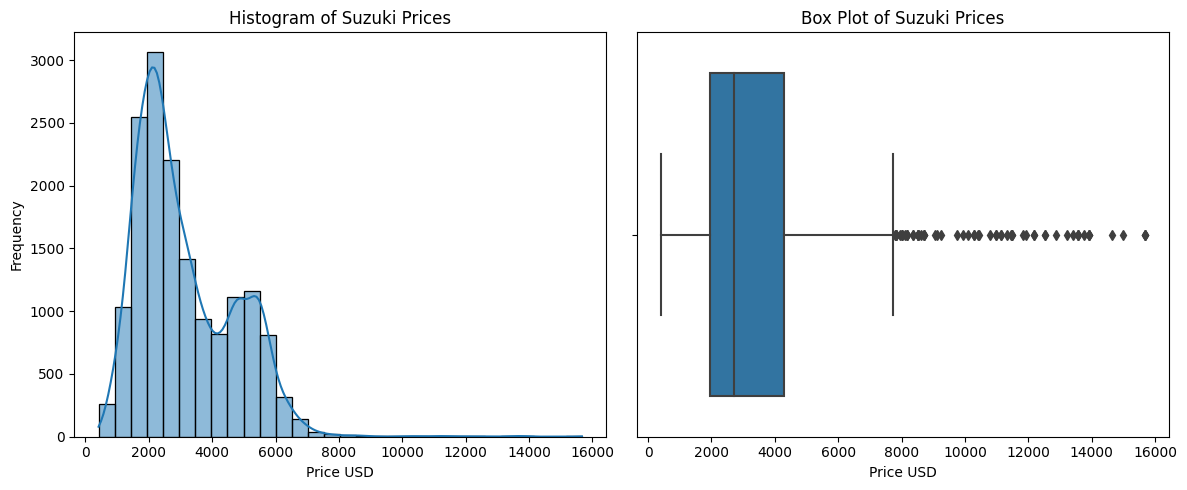

Mean Price for Toyota: $10429.03
Median Price for Toyota: $7642.23
Price Range for Toyota: $203290.16
Standard Deviation of Price for Toyota: $14004.31


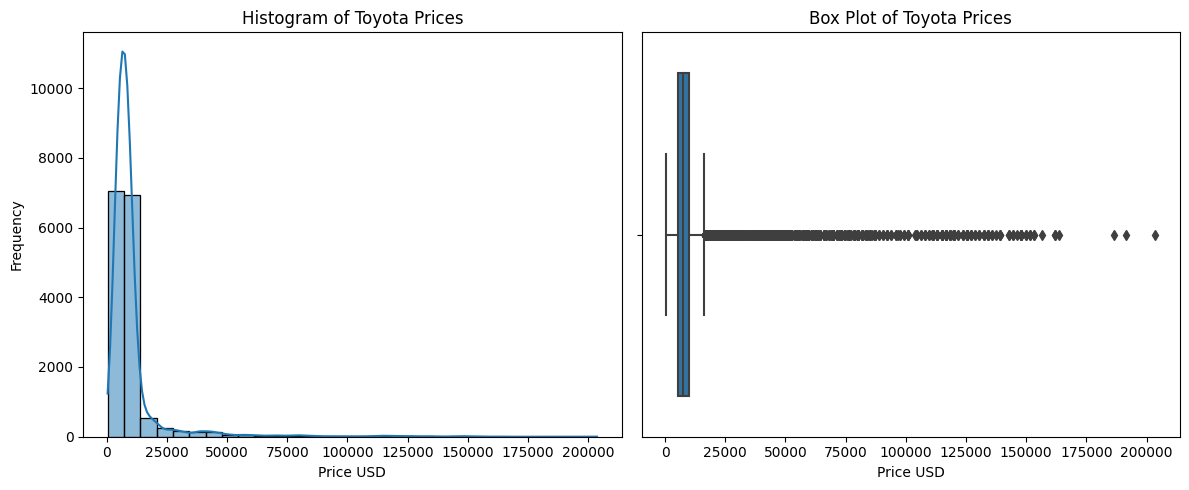

In [ ]:
# call the brand analyzer function from the helper.py file
from data_exploration_helper import (analyze_brand_prices)
analyze_brand_prices(car_df, 'Suzuki')
analyze_brand_prices(car_df, 'Toyota')

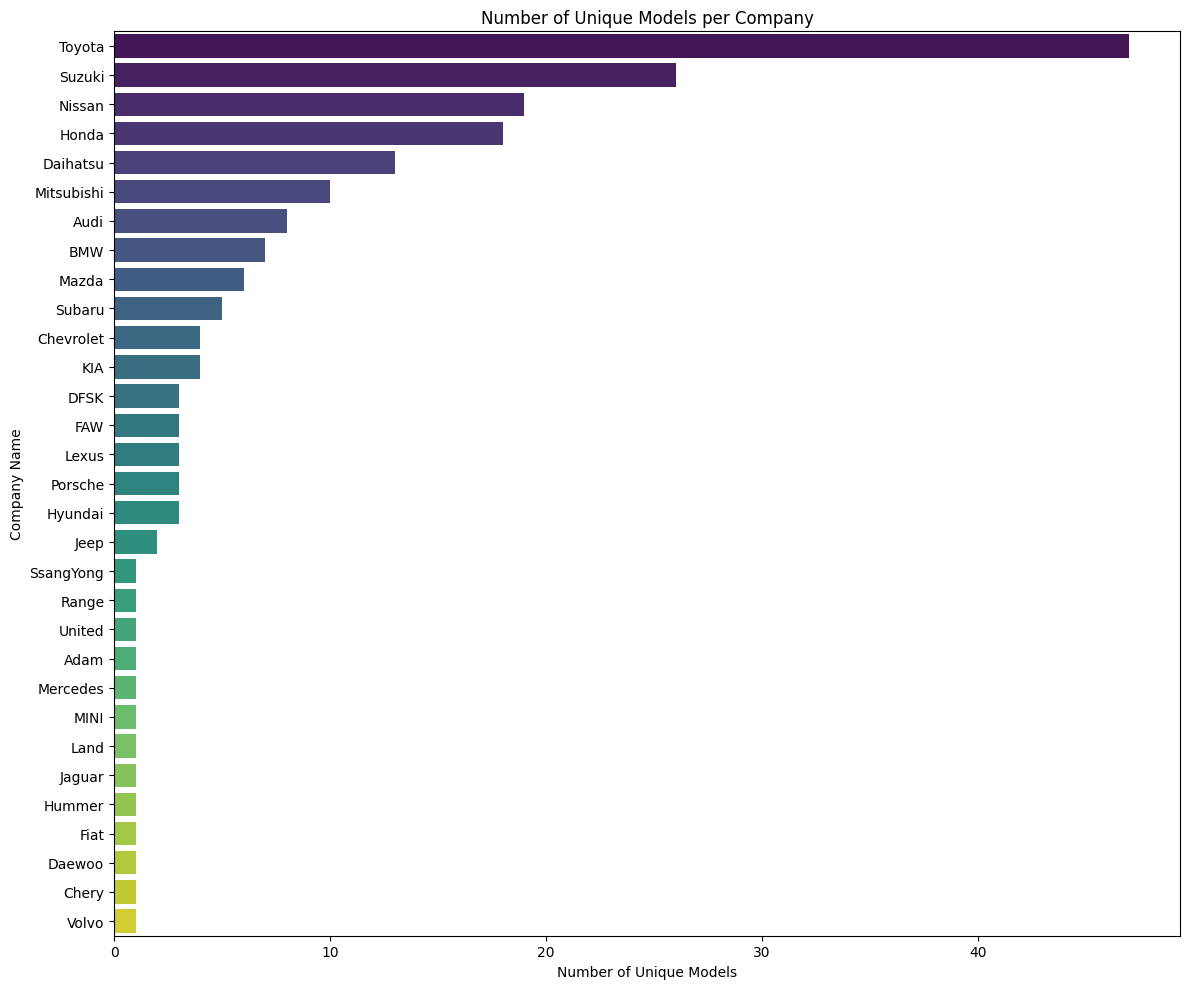

In [ ]:
# call the visualize model counts function from the helper.py file
from data_exploration_helper import (visualize_model_counts)
visualize_model_counts(car_df)

<span style="font-size:20px">**Car Buying Algorithm**</span>

In [ ]:
# Returns: 1. car to be purchased based on defined parameters,
#          2. money spent on the cars.
def buy_car(data, budget):

  i = 0
  dollars_spent = 0
  bought_cars = data[0:0]

  data = data.sort_values(by=['Mileage','Price USD'])
  data = data.reset_index(drop=True)

  # Try/Except to catch KeyError
  try:
    # Keeps looping if there is money left in the budget
    while budget > dollars_spent:
      # Checks to see if this potential car to be purchased
      # is not in the df of previously purchased cars.
      # Moves down the index until it selects a car not purchased yet.
      while data.at[i, 'ID'] in car_lot['ID'].values:
        i+=1

      # Checks to see if adding the next car will go over budget
      if budget < dollars_spent + data.at[i, 'Price USD']:
        break
      # Adds the car to be purchased in dataframe
      bought_cars=bought_cars.append(data.iloc[i])
      dollars_spent += data.at[i, 'Price USD']
      i+=1

  except KeyError:
    print('Out of Range, no more cars that fit the parameters.\n'+
              'Edit parameters for broader search.')

  return (bought_cars, dollars_spent)

### Market Segments
# Total Budget: 3,000,000

# Student budget: 300,000
s_df = car_df[
    #(car_df['Company Name'].isin(['Toyota', 'Nissan', 'Mercedes'])) &
    (car_df['Price USD'].between(3000, 8000)) &
    (car_df['Mileage'].between(30000, 100000)) &
    (car_df['Car Age'].between(5, 10))
]

# Young Pro Budget: 1,200,000
yp_df = car_df[
    #(car_df['Company Name'].isin(['Toyota', 'Nissan', 'Mercedes'])) &
    (car_df['Price USD'].between(5000, 10000)) &
    (car_df['Mileage'].between(20000, 50000)) &
    (car_df['Car Age'].between(1, 5))
]

# Families Budget: 900,000
f_df = car_df[
    #(car_df['Company Name'].isin(['Toyota', 'Nissan', 'Mercedes'])) &
    (car_df['Price USD'].between(10000, 20000)) &
    (car_df['Mileage'].between(10000, 60000)) &
    (car_df['Car Age'] <= 7)
]

# Retiree Budget: 600,000
r_df = car_df[
    #(car_df['Company Name'].isin(['Toyota', 'Nissan', 'Mercedes'])) &
    (car_df['Price USD'].between(8000, 25000)) &
    (car_df['Mileage'] <= 40000) & (car_df['Mileage'] >= 10000) &
    (car_df['Car Age'] <= 5)
]
s_df = s_df.reset_index(drop=True)
yp_df = yp_df.reset_index(drop=True)
f_df = f_df.reset_index(drop=True)
r_df = r_df.reset_index(drop=True)


from google.colab import files
def purchase_plot():

#image = plt.figure(figsize=(16,10))
  plt.figure(figsize=(16,10))

  sns.kdeplot(segment_1, x='Price USD', palette='#0039a6', label="Student", fill=True),
  sns.kdeplot(segment_2, x="Price USD", color="#c40c30", label="Young Professional", fill=True),
  sns.kdeplot(segment_3, x="Price USD", color="#001e5b", label="Family", fill=True),
  sns.kdeplot(segment_4, x="Price USD", color="#006f43", label="Retiree", fill=True)
  plt.legend(fontsize=20)

  font = {'size': 20}
  plt.rc('font', **font)

  plt.suptitle('\nPurchased Car Segment Distribution', fontsize=24, fontweight='bold')

#image = plt.figure(figsize=(16,10), dpi= 200)
#image.savefig('myimage.png', dpi=1000, bbox_inches="tight")
#files.download('myimage.png')
  plt.show()



car_lot = car_df[0:0]

segment_1, money_1 = buy_car(s_df, 300000)
car_lot = segment_1

segment_2, money_2 = buy_car(yp_df, 1200000)
car_lot = pd.concat([segment_1, segment_2], ignore_index=True)

segment_3, money_3 = buy_car(f_df, 900000)
car_lot = pd.concat([segment_1, sgement_2, segment_3], ignore_index=True)

segment_4, money_4 = buy_car(r_df, 600000)

total = pd.concat([segment_1, segment_2, segment_3, segment_4], ignore_index=True)

NameError: ignored

Contributor: James Hodgson

In [ ]:
car_lot = car_df[0:0]

segment_1, money_1 = buy_car(s_df, 300000)
car_lot = segment_1

segment_2, money_2 = buy_car(yp_df, 1200000)
car_lot = pd.concat([segment_1, segment_2], ignore_index=True)

segment_3, money_3 = buy_car(f_df, 900000)
car_lot = pd.concat([segment_1, sgement_2, segment_3], ignore_index=True)

segment_4, money_4 = buy_car(r_df, 600000)

total = pd.concat([segment_1, segment_2, segment_3, segment_4], ignore_index=True)